# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [187]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/github-classroom/BEE4750-FA23/hw01-teaganraesmith`


In [188]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [189]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

By beginning the min_value at equal to 0, if the array has all values above 0, it will never recieve a new minimum value to return. Essentially, the code looks for a lesser value than min_value in the array, so if they're all greater than 0, it won't actually return a number from the array, just 0.

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [190]:
function minimum(array)
    min_value = Inf #Zero changed to Inf for arrays all >0.
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

The minimum value was found to be 78.

### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [191]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

average_grade = 94.4


#### Problem 2.1 (3 points)



Describe the logic and/or syntax error.

The error that came up on my system was "UndefVarError: `average_grade` not defined." To remedy this, I called the function to begin the code between function and end which calculates the mean. To call a function you set a variable=the function call with the imported data in parenthesis. 

Additionally, I recieved the error that "mean" was not defined. To fix this, I utilized "import: Statistics: mean" so the program had statistical to calculate the mean.

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [192]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
import Statistics: mean #New imported package for mean
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

average_grade=class_average(student_grades) #Call to the function above
@show average_grade

average_grade = 94.4


94.4

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

As shown above, the average grade is found to be 94.4.

### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [193]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

The purpose of this function is to create a list of values which has no repeated values. It takes each number from the given values v and compares it to the new list of values (y) and if the value is new, it is appended onto the end, while if it already exists, it is not added on. This continues until the list of values ends.

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

In [194]:
function mystery_function(values)
    y = [] #Empty array of values
    for v in values 
        if !(v in y) #Checking if the number v is already in y
            append!(y, v) #Appending to y if not already there
        end
    end
    return y #Returning the list of values
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values); 

mystery_function(list_of_values) = Any[1, 2, 3, 4]


### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

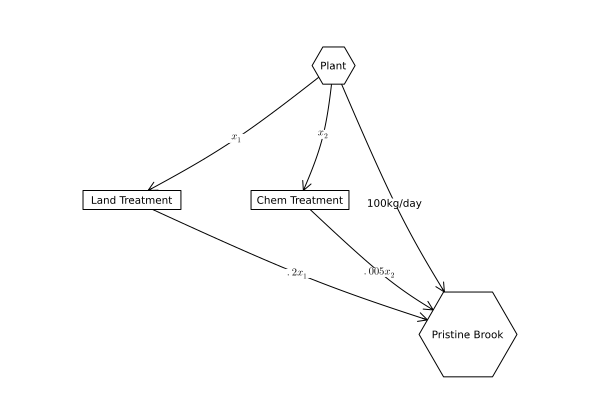

In [195]:
using GraphRecipes, Plots
using LaTeXStrings
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = (Dict((1, 2) => L"x_1", (1,3) => L"x_2", 
    (1, 4) => "100kg/day", (2, 4) => L".2x_1", (3, 4) => L".005x_2"))
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

The cost for the land treatment is $x_1^2/20$ dollars per day. The efficiency is .8*$x_1$, so .2*$x_1$ kg YUK/day drains back into the river from the land treatment.

The efficiency of chemical treatment is e=1-.005*$x_2$. Therefore, 1-e*$x_2$ kg YUK/day drains back into the river from this treatment. The cost for chemical treatment is 1.5 dollars/$m^3$ of wastewater, so 1.5*$x_2$ dollars. 

Combining these facts, the total cost for both treatments is $x_1^2/20 + 1.5*x_2$. The total drainage back to the creek of the 100kg/day of wastewater total is .2*$x_1$+(1-e*$x_2$). Please note that based on the given problem set, $x_1+x_2$ should total to 100kg/day of wastewater, but this is under the discretion of the function user to choose those values.

#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [196]:
function multiple_return_values(x, y)
    return (x+y, x*y)
end

a, b = multiple_return_values(2, 5)
@show a;
@show b;

a = 7
b = 10


Make sure you comment your code appropriately to make it clear what is
going on and why.

In [197]:
function yuk_cost_conc(x1, x2)
    if x1+x2 == 100 #Confirming total wastewater=100kg/day
    #Calculating efficiency for chemical treatment
    e=1-.005*x2;
    
    #Adding drainage from land to river and drainage from chemical
    yuk_conc=(.2*x1)+(1-e)*x2; 
    
    #Adding cost for chemical and land treatment
    yuk_cost_perday=(1.5*x2)+(x1^2)/20 
    return (yuk_conc, yuk_cost_perday)
    else
        (println("The quantity of wastewater does not equal 100. 
        Please try again so x1+x2 totals to 100"))
    end
end

yuk_cost_conc (generic function with 1 method)

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

As shown below, keeping the YUK concentration at 20kg/day, one could have 60kg/day of waste being treated with land treatment and 40kg/day with chemical treatment. The total cost would be $240/day. 

To find a better solution you could write code which cycles between all numbers where x1+x2=100 in some numeric intervals and then saves only the combinations of x1 and x2 which have the YUK concentration below 20kg/day draining into the river and saving only the lowest value for cost. This would be much faster and more efficient than someone trying all values themselves, I suggest a for or a while loop for this task depending on the type of code.

In [198]:
yuk_cost_conc(60, 40)
#Returns the drainage limit and cost total for treatment

(20.0, 240.0)

## References

List any external references consulted, including classmates.

Worked with some assistance in importing packages (import Statistics: mean) with Emma-Rose Connolly and Mia Rusk.